# Data is the new oil

<div>
<img src="images/info.png" width="500"/>
</div>

[Image source](https://www.stadafa.com/2021/10/largest-companies-2010-vs-2021.html)


Clive Humby, a british mathematician, is credited with coining the phrase "data is the new oil." 

This quote was expanded by Michael Palmer with the assertion that data is "valuable, but if unrefined it cannot really be used.  Oil has to be changed into gas, plastic, chemicals, etc to create a valuable entity that drives profitable activity; so, data must be broken down and analysed for it to have value."


# Public data APIs

How do we access amazing data? The answer is data APIs.

## What is an API?
API stands for Application Programming Interface and it serves as a data transmitter between two different pieces of software. The term has historically been used to describe any sort of connectivity interface to an application. 

Today, the term API typically takes an additional meaning:
- Modern APIs adhere to certain standards (typically HTTP and REST) 
- They are treated like products
- They often adhere to high security standards

## Types of APIs

### By availability
- **Open and public APIs** are available to everyone. Open APIs will be completely open, in the sense that they will provide access to the complete architecture and all features of their code.  Public APIs, contrarily, will provide restricted access to the codes and datasets.

<img src="images/open-apis.png" width=400 height=400 />

- **Internal APIs** are used in-house by developers.

- **Partner APIs** are a form of open API where access is granted under certain conditions determined by the publisher.

### By structure
APIs also differ in architecture. The most popular API architectures are:
- **JSON-RPC and XML-RPC**
RPC stands for Remote Procedure Call and is a protocol for data transmission in JSON or XML format. 
- **REST**
REST stands for representational state transfer. It's a software architectural style that provides a set of recommendations for web development. 
- **SOAP** stands for simple object access protocol and is a definition of API protocols and standards.  

## Accessing a Public Data API with Python

In order to retrieve data from an API we will combine the ``request`` library and the ``JSON`` library.

When we want to receive data from the API we first make a *request*.

To do so in python, we need to install the ``requests`` library.

In [1]:
import requests

### Example: NASA's APOD API

Let us test out [NASA's open API](https://api.nasa.gov/):

In [2]:
demo_key = "DEMO_KEY"

url = "https://api.nasa.gov/planetary/apod?api_key=" + demo_key

response = requests.get(url)
response

200 https://api.nasa.gov/planetary/apod?api_key=DEMO_KEY
headers:   Access-Control-Allow-Origin: *
  Access-Control-Expose-Headers: X-RateLimit-Limit, X-RateLimit-Remaining
  Age: 0
  Connection: keep-alive
  Content-Encoding: gzip
  Content-Type: application/json
  Date: Wed, 26 Oct 2022 09:39:46 GMT
  Strict-Transport-Security: max-age=31536000; preload
  Transfer-Encoding: chunked
  Vary: Accept-Encoding
  Via: http/1.1 api-umbrella (ApacheTrafficServer [cMsSf ])
  X-Cache: MISS
  X-Content-Type-Options: nosniff
  X-Frame-Options: DENY
  X-Ratelimit-Limit: 40
  X-Ratelimit-Remaining: 39
  X-Vcap-Request-Id: 8df3ff08-2156-4119-5f94-7fbd8714228b
  X-XSS-Protection: 1; mode=block

body (application/json):
{'copyright': 'Andy Ermolli',
 'date': '2022-10-26',
 'explanation': "When does a nebula look like a comet?  In this crowded starfield, covering over two degrees within the high flying constellation of the Swan (Cygnus), the eye is drawn to the Cocoon Nebula. A compact star forming re

In [3]:
import json
data = response.json()
from IPython.display import Image
from IPython.core.display import HTML 

print(response.json()['explanation'])
Image(url=data['url'], width=600)

When does a nebula look like a comet?  In this crowded starfield, covering over two degrees within the high flying constellation of the Swan (Cygnus), the eye is drawn to the Cocoon Nebula. A compact star forming region, the cosmic Cocoon punctuates a nebula bright in emission and reflection on the left, with a long trail of interstellar dust clouds to the right, making the entire complex appear a bit like a comet. Cataloged as IC 5146, the central bright head of the nebula spans about 10 light years, while the dark dusty tail spans nearly 100 light years.  Both are located about 2,500 light years away. The bright star near the bright nebula's center, likely only a few hundred thousand years old, supplies power to the nebular glow as it helps clear out a cavity in the molecular cloud's star forming dust and gas. The long dusty filaments of the tail, although dark in this visible light image, are themselves hiding stars in the process of formation, stars that can be seen at infrared wav

## Key concepts:

**Get and post**

The two most common requests we make are ``get`` and ``post``:
- `GET` is used for viewing (without changing)
- `POST` is used for changing, and sometimes viewing data

**Response codes**

We can check the response code to see if our request was successfull. 

In [4]:
if 200 <= response.status_code < 300:
    print('Request succeeded!')
else: 
    print(f'Uh oh, we got response code {response.status_code}...')

Request succeeded!


Here are some common status codes: 

(defined by HTTP)

| Code | Status | Description |
| --- | --- | --- |
| 200 | OK | The request was successfully completed   |
| 400 | Bad request| The request was invalid. |
| 401 | Unauthorized | The request did not include an authentication token or the authentication token was expired. |
| 403 | Forbidden | The client did not have permission to access the requested resource. |
| 404 | Not Found | The requested resource was not found. |
| 405 | Not Allowed | The client did not have permission to access the requested resource. |
| 500 | Internal Server Error | The request was not completed due to an internal error on the server side. |
| 503 | Service unavailable | The server was unavailable. |

**Headers**

We can communicate metadata (like who we are) to the API by means of a *header*.

The API also communicates back to us with a header:


In [6]:
dict(response.headers)

{'Date': 'Wed, 26 Oct 2022 09:39:46 GMT',
 'Content-Type': 'application/json',
 'Transfer-Encoding': 'chunked',
 'Connection': 'keep-alive',
 'Access-Control-Allow-Origin': '*',
 'Access-Control-Expose-Headers': 'X-RateLimit-Limit, X-RateLimit-Remaining',
 'Age': '0',
 'Content-Encoding': 'gzip',
 'Strict-Transport-Security': 'max-age=31536000; preload',
 'Vary': 'Accept-Encoding',
 'Via': 'http/1.1 api-umbrella (ApacheTrafficServer [cMsSf ])',
 'X-Cache': 'MISS',
 'X-Ratelimit-Limit': '40',
 'X-Ratelimit-Remaining': '39',
 'X-Vcap-Request-Id': '8df3ff08-2156-4119-5f94-7fbd8714228b',
 'X-Frame-Options': 'DENY',
 'X-Content-Type-Options': 'nosniff',
 'X-XSS-Protection': '1; mode=block'}

**Etiquette** 

When you access a public data API you are expected to follow the playing rules of the API. Therefore you should always start by checking the documentation on the website for the API.

<div>
<img src="images/rtfm.png" width="250"/>
</div>


### Exercise

1. make a request to a public API

For examples:

- https://publicapis.dev
- https://www.api.toys/api/


In [21]:
url = "https://meowfacts.herokuapp.com/"
r = requests.get(...)

data = r. ...
data

{'data': ["Like birds, cats have a homing ability that uses its biological clock, the angle of the sun, and the Earth's magnetic field. A cat taken far from its home can return to it. But if a cat's owners move far from its home, the cat can't find them."]}

In [ ]:
requests.get?

-----------
## Data formats


The actual data typically gets returned in a ``JSON``, ``XML`` or ``CSV file``.


### CSV

A Comma-Separated Values file is a delimited text file that uses a comma to separate values. It typically stores *tabular data*.

<div>
<img src="images/covid-nums.png" width="300"/>
</div>

*Example*: FHI provides [data](https://www.fhi.no/sv/smittsomme-sykdommer/corona/dags--og-ukerapporter/dags--og-ukerapporter-om-koronavirus/) about the number of confirmed COVID cases in Norway as a .csv file.



### JSON
JSON is the most common way of sending data back and forth in APIs. 

A JavaScript Object Notation (JSON) file encodes *data structures* so that they are easy to read for machines and somewhat easy to read for humans.

JSON is a text file or string that follows the JavaScript object syntax. Most programming languages will have the ability to read (parse) and generate JSON files. 

The ``json`` library in Python has two main functions:
- `json.dumps()` Takes in a python object and converts it (dumps it) to a string
- `json.loads()` Takes in a JSON string and converts it (loads it) to a Python object.

which will convert from/to the following formats

| JSON | Python | 
| --- | --- | 
| object | dict | 
| array  | list | 
| string | str  | 
| number |  int or float | 
| true | True | 
| false | False | 
| null | None | 


Let's look at what NASA gave us


In [22]:
# Load data using response.json 
response.json?

Signature: response.json(**kwargs)
Docstring:
Returns the json-encoded content of a response, if any.

:param \*\*kwargs: Optional arguments that ``json.loads`` takes.
:raises requests.exceptions.JSONDecodeError: If the response body does not
    contain valid json.
File:      ~/conda/lib/python3.10/site-packages/requests/models.py
Type:      method


In [24]:
data = response.json()

print('response.json is a ' + str(type(data)))
print('Printing it yields: ')

data

response.json is a <class 'dict'>
Printing it yields: 


{'copyright': 'Andy Ermolli',
 'date': '2022-10-26',
 'explanation': "When does a nebula look like a comet?  In this crowded starfield, covering over two degrees within the high flying constellation of the Swan (Cygnus), the eye is drawn to the Cocoon Nebula. A compact star forming region, the cosmic Cocoon punctuates a nebula bright in emission and reflection on the left, with a long trail of interstellar dust clouds to the right, making the entire complex appear a bit like a comet. Cataloged as IC 5146, the central bright head of the nebula spans about 10 light years, while the dark dusty tail spans nearly 100 light years.  Both are located about 2,500 light years away. The bright star near the bright nebula's center, likely only a few hundred thousand years old, supplies power to the nebular glow as it helps clear out a cavity in the molecular cloud's star forming dust and gas. The long dusty filaments of the tail, although dark in this visible light image, are themselves hiding sta

-------

### Exercise

2. Make a get request from the [NASA Mars Rover API](https://api.nasa.gov/) to get pictures from Mars. 
3. Specifiy the camera viewpoint in parameters

In [25]:
# Get satellite image from Houston
parameters = {
    "sol": 1000,
}

url = "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos?page=1&api_key=DEMO_KEY"
r = requests.get(url, params=parameters)
r.json()

{'photos': [{'id': 102693,
   'sol': 1000,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01000/opgs/edr/fcam/FLB_486265257EDR_F0481570FHAZ00323M_.JPG',
   'earth_date': '2015-05-30',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active'}},
  {'id': 102694,
   'sol': 1000,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01000/opgs/edr/fcam/FRB_486265257EDR_F0481570FHAZ00323M_.JPG',
   'earth_date': '2015-05-30',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active'}},
  {'id': 102850,
   'sol': 1000,
   'camera': {'id': 2

## Entur API

The NASA is a good 'hello world' example of APIs but it does not quite showcase the usefullness of APIs. 

Entur has APIs is an example of an open API, that features both an open source code and APIs for stops, real-time data, mobility trends etc.

The following snippet is adapted from [ruterstop](https://github.com/stigok/ruterstop) by [stigok](https://github.com/stigok):

In [10]:
stop_id = 5926

__version__ = "0.5.1"

ENTUR_CLIENT_ID = __version__

ENTUR_GRAPHQL_ENDPOINT = "https://api.entur.io/journey-planner/v2/graphql"

ENTUR_GRAPHQL_QUERY = """
{
  stopPlace(id: "NSR:StopPlace:5926") {
    name
    estimatedCalls(timeRange: 72100, numberOfDepartures: 20) {
      expectedArrivalTime
      realtime
      destinationDisplay {
        frontText
      }
      serviceJourney {
        directionType
        line {
          publicCode
        }
      }
    }
  }
}
"""

headers = {
        "Accept": "application/json",
        "ET-Client-Name": "UIO:IN3110 - ingeborggjerde",
        "ET-Client-Id": ENTUR_CLIENT_ID,
    }

qry = ENTUR_GRAPHQL_QUERY % dict(stop_id=stop_id)
res = requests.post(
    ENTUR_GRAPHQL_ENDPOINT,
    headers=headers,
    timeout=5,
    json=dict(query=qry, variables={}),
)

In [11]:
res.json()

{'data': {'stopPlace': {'name': 'Manglerudveien',
   'estimatedCalls': [{'expectedArrivalTime': '2022-10-26T11:45:12+0200',
     'realtime': True,
     'destinationDisplay': {'frontText': 'Skullerud'},
     'serviceJourney': {'directionType': 'inbound',
      'line': {'publicCode': '70'}}},
    {'expectedArrivalTime': '2022-10-26T11:54:44+0200',
     'realtime': True,
     'destinationDisplay': {'frontText': 'Nationaltheatret'},
     'serviceJourney': {'directionType': 'outbound',
      'line': {'publicCode': '70'}}},
    {'expectedArrivalTime': '2022-10-26T12:01:03+0200',
     'realtime': True,
     'destinationDisplay': {'frontText': 'Skullerud'},
     'serviceJourney': {'directionType': 'inbound',
      'line': {'publicCode': '70'}}},
    {'expectedArrivalTime': '2022-10-26T12:08:00+0200',
     'realtime': True,
     'destinationDisplay': {'frontText': 'Nationaltheatret'},
     'serviceJourney': {'directionType': 'outbound',
      'line': {'publicCode': '70'}}},
    {'expectedArriva

## Getting public API data into pandas

Let's check the weather

Yr has an API: https://developer.yr.no

They ask you to identify yourself in the User-Agent header: https://developer.yr.no/doc/TermsOfService/

In [28]:
url= 'https://api.met.no/weatherapi/locationforecast/2.0/compact?lat=51.5&lon=0'
s = requests.Session()
s.headers["User-Agent"] = "uio-in3110 https://github.com/uio-in3110/uio-in3110.github.io"
r = s.get(url)
r

200 https://api.met.no/weatherapi/locationforecast/2.0/compact?lat=51.5&lon=0
headers:   Accept-Ranges: bytes
  Access-Control-Allow-Headers: Origin
  Access-Control-Allow-Methods: GET
  Access-Control-Allow-Origin: *
  Age: 0
  Connection: keep-alive
  Content-Encoding: gzip
  Content-Length: 2769
  Content-Type: application/json
  Date: Wed, 26 Oct 2022 09:54:29 GMT
  Expires: Wed, 26 Oct 2022 10:24:47 GMT
  Last-Modified: Wed, 26 Oct 2022 09:54:29 GMT
  Server: nginx/1.18.0 (Ubuntu)
  Vary: Accept, Accept-Encoding
  Via: 1.1 varnish (Varnish/7.0)
  X-Backend-Host: b_157_249_75_149_loc
  X-Varnish: 659146107

body (application/json):
{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [0, 51.5, 4]},
 'properties': {'meta': {'updated_at': '2022-10-26T09:29:21Z',
   'units': {'air_pressure_at_sea_level': 'hPa',
    'air_temperature': 'celsius',
    'cloud_area_fraction': '%',
    'precipitation_amount': 'mm',
    'relative_humidity': '%',
    'wind_from_direction': 'degre

In [51]:
data = r.json()
data['properties']['timeseries'][0]

{'time': '2022-10-26T09:00:00Z',
 'data': {'instant': {'details': {'air_pressure_at_sea_level': 1009.7,
    'air_temperature': 16.9,
    'cloud_area_fraction': 100.0,
    'relative_humidity': 78.6,
    'wind_from_direction': 205.9,
    'wind_speed': 7.6}},
  'next_12_hours': {'summary': {'symbol_code': 'cloudy'}},
  'next_1_hours': {'summary': {'symbol_code': 'lightrain'},
   'details': {'precipitation_amount': 0.2}},
  'next_6_hours': {'summary': {'symbol_code': 'cloudy'},
   'details': {'precipitation_amount': 0.3}}}}

In [55]:
data['properties'].keys()

dict_keys(['meta', 'timeseries'])

In [35]:
def tidy_format(record):
    tidy_dict = {
        "time": record["time"]
    }
    for section, sub_dict in record["data"].items():
        for _, fields in sub_dict.items():
            for sub_key, value in fields.items():
                if section == 'instant':
                    key = sub_key
                else:
                    key = f"{section}_{sub_key}"
                tidy_dict[key] = value
    return tidy_dict

tidy_format(_33)

{'time': '2022-10-26T09:00:00Z',
 'air_pressure_at_sea_level': 1009.7,
 'air_temperature': 16.9,
 'cloud_area_fraction': 100.0,
 'relative_humidity': 78.6,
 'wind_from_direction': 205.9,
 'wind_speed': 7.6,
 'next_12_hours_symbol_code': 'cloudy',
 'next_1_hours_symbol_code': 'lightrain',
 'next_1_hours_precipitation_amount': 0.2,
 'next_6_hours_symbol_code': 'cloudy',
 'next_6_hours_precipitation_amount': 0.3}

In [41]:
tidy_records = [tidy_format(record) for record in r.json()['properties']['timeseries']]

In [47]:
df = pd.DataFrame.from_dict(tidy_records)
df["time"] = pd.to_datetime(df["time"])
df = df.set_index("time")
df

,air_pressure_at_sea_level,air_temperature,cloud_area_fraction,relative_humidity,wind_from_direction,wind_speed,next_12_hours_symbol_code,next_1_hours_symbol_code,next_1_hours_precipitation_amount,next_6_hours_symbol_code,next_6_hours_precipitation_amount
time,,,,,,,,,,,
2022-10-26 09:00:00+00:00,1009.7,16.9,100.0,78.6,205.9,7.6,cloudy,lightrain,0.2,cloudy,0.3
2022-10-26 10:00:00+00:00,1010.4,16.8,85.2,82.3,208.7,7.3,cloudy,partlycloudy_day,0.0,cloudy,0.1
2022-10-26 11:00:00+00:00,1011.0,18.3,95.3,75.2,214.8,8.3,partlycloudy_day,cloudy,0.0,partlycloudy_day,0.0
2022-10-26 12:00:00+00:00,1011.6,18.5,100.0,72.8,218.7,8.4,partlycloudy_day,cloudy,0.0,partlycloudy_day,0.0
2022-10-26 13:00:00+00:00,1012.0,18.7,94.5,70.3,220.3,8.1,partlycloudy_day,partlycloudy_day,0.0,partlycloudy_day,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-03 12:00:00+00:00,1013.0,14.9,18.7,69.4,224.7,8.4,partlycloudy_day,NaN,NaN,fair_day,0.0
2022-11-03 18:00:00+00:00,1014.5,12.2,100.0,71.1,219.5,5.8,partlycloudy_day,NaN,NaN,cloudy,0.0
2022-11-04 00:00:00+00:00,1015.6,11.4,100.0,74.4,229.7,5.6,fair_day,NaN,NaN,cloudy,0.0


<AxesSubplot:xlabel='time'>

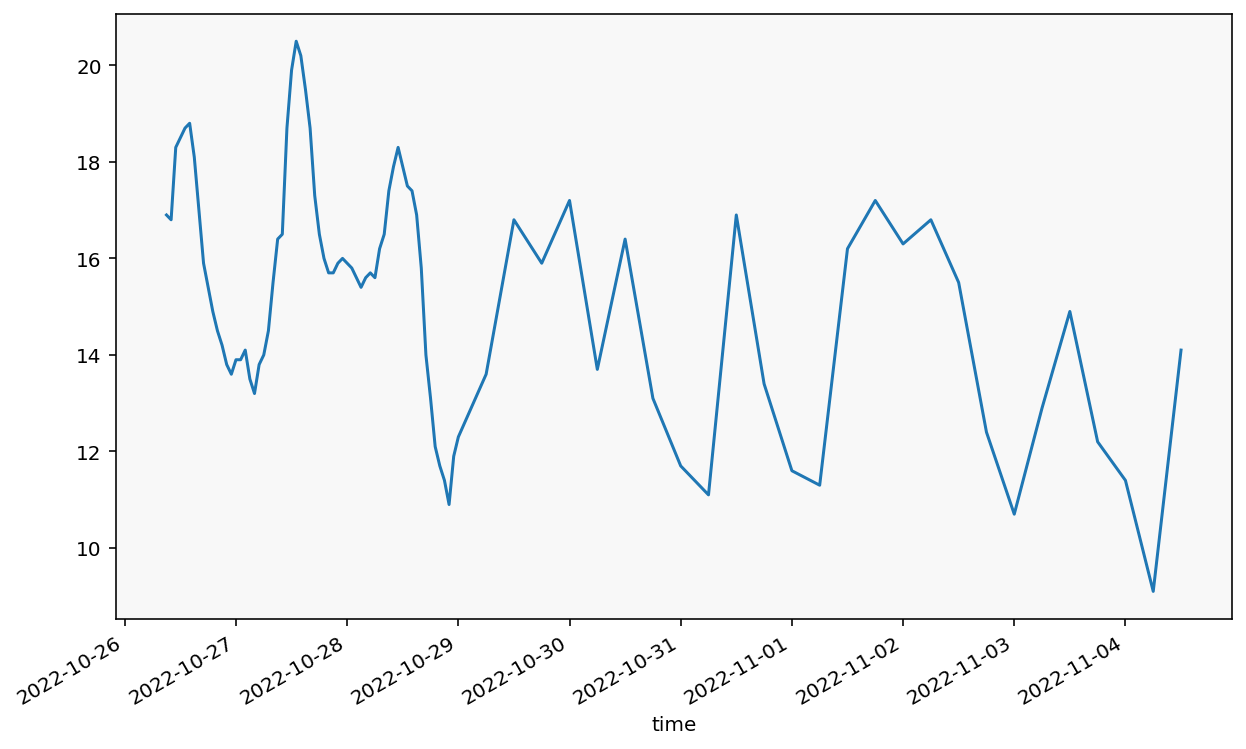

In [48]:
df.air_temperature.plot()

In [59]:
r = requests.get("https://geocode.maps.co/search", params={"city": "Bergen", "country": "Norway"})
r.json()

[{'place_id': 286402934,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'powered_by': 'Map Maker: https://maps.co',
  'osm_type': 'relation',
  'osm_id': 404159,
  'boundingbox': ['60.1760905', '60.5360925', '5.1445788', '5.6867918'],
  'lat': '60.3943055',
  'lon': '5.3259192',
  'display_name': 'Bergen, Vestland, Norge',
  'class': 'boundary',
  'type': 'administrative',
  'importance': 0.7312391232119534},
 {'place_id': 62960991,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'powered_by': 'Map Maker: https://maps.co',
  'osm_type': 'node',
  'osm_id': 5638206557,
  'boundingbox': ['59.6009016', '59.6209016', '8.9104283', '8.9304283'],
  'lat': '59.6109016',
  'lon': '8.9204283',
  'display_name': 'Bergen, Hjartdal, Vestfold og Telemark, 3692, Norge',
  'class': 'place',
  'type': 'farm',
  'importance': 0.30999999999999994}]

In [64]:
def locate_city(city, country="Norway"):
    """return (lat, long) for a city"""
    r = requests.get(
        "https://geocode.maps.co/search", params={"city": city, "country": country}
    )
    matches = r.json()
    if len(matches) < 1:
        raise ValueError(f"No match for {city}, {country}")

    location = matches[0]
    return (float(location["lat"]), float(location["lon"]))

In [65]:
locate_city("Oslo")

(59.9133301, 10.7389701)

In [66]:
locate_city("Bergen")

(60.3943055, 5.3259192)

<AxesSubplot:>

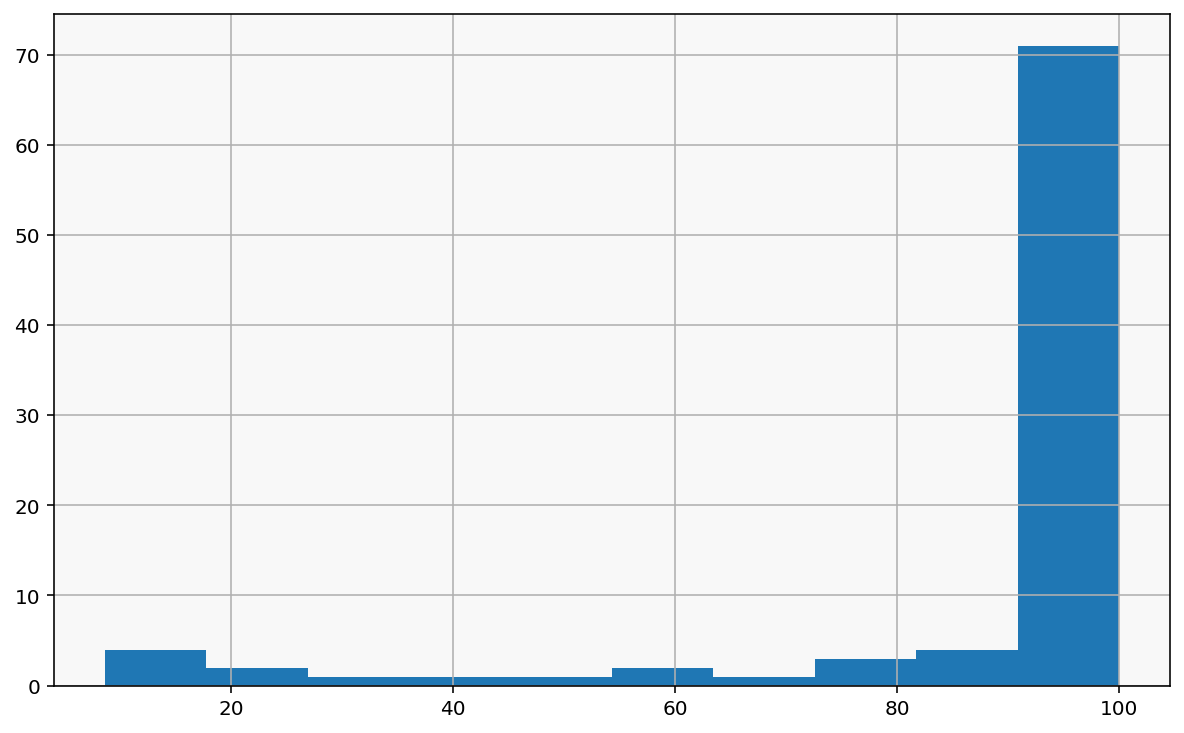

In [67]:
df.cloud_area_fraction.hist()

In [78]:
def city_forecast(city, country="Norway"):
    lat, lon = locate_city(city, country)
    url = "https://api.met.no/weatherapi/locationforecast/2.0/compact"
    r = s.get(url, params={"lat": lat, "lon": lon})
    tidy_records = [
        tidy_format(record) for record in r.json()["properties"]["timeseries"]
    ]
    df = pd.DataFrame.from_dict(tidy_records)
    df["time"] = pd.to_datetime(df["time"])
    # df = df.set_index("time")
    df["city"] = city
    return df

oslo = city_forecast("Oslo")
oslo

,time,air_pressure_at_sea_level,air_temperature,cloud_area_fraction,relative_humidity,wind_from_direction,wind_speed,next_12_hours_symbol_code,next_1_hours_symbol_code,next_1_hours_precipitation_amount,next_6_hours_symbol_code,next_6_hours_precipitation_amount,city
0,2022-10-26 12:00:00+00:00,1014.1,7.6,98.8,91.5,287.0,0.6,lightrain,cloudy,0.0,cloudy,0.0,Oslo
1,2022-10-26 13:00:00+00:00,1014.4,8.6,96.9,86.6,303.8,0.5,lightrain,partlycloudy_day,0.0,cloudy,0.0,Oslo
2,2022-10-26 14:00:00+00:00,1014.5,9.0,99.1,85.1,270.0,0.7,lightrain,cloudy,0.0,cloudy,0.0,Oslo
3,2022-10-26 15:00:00+00:00,1014.4,9.1,99.1,85.1,270.1,0.7,lightrain,cloudy,0.0,cloudy,0.0,Oslo
4,2022-10-26 16:00:00+00:00,1014.3,8.9,100.0,85.9,239.7,0.5,lightrain,cloudy,0.0,lightrain,0.9,Oslo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2022-11-03 18:00:00+00:00,1000.8,10.0,100.0,97.4,176.5,4.1,lightrain,NaN,NaN,lightrain,0.5,Oslo
79,2022-11-04 00:00:00+00:00,1000.0,10.1,100.0,99.4,140.9,3.9,lightrain,NaN,NaN,lightrain,0.5,Oslo
80,2022-11-04 06:00:00+00:00,996.8,9.2,100.0,98.9,175.2,3.9,cloudy,NaN,NaN,cloudy,0.0,Oslo
81,2022-11-04 12:00:00+00:00,996.4,9.9,100.0,94.1,176.6,3.6,NaN,NaN,NaN,cloudy,0.0,Oslo


In [129]:
forecasts = pd.concat(
    city_forecast(city)
    for city in ("Oslo", "Bergen", " Tromsø", "Trondheim")
)
forecasts

,time,air_pressure_at_sea_level,air_temperature,cloud_area_fraction,relative_humidity,wind_from_direction,wind_speed,next_12_hours_symbol_code,next_1_hours_symbol_code,next_1_hours_precipitation_amount,next_6_hours_symbol_code,next_6_hours_precipitation_amount,city
0,2022-10-26 12:00:00+00:00,1014.1,7.6,98.8,91.5,287.0,0.6,lightrain,cloudy,0.0,cloudy,0.0,Oslo
1,2022-10-26 13:00:00+00:00,1014.4,8.6,96.9,86.6,303.8,0.5,lightrain,partlycloudy_day,0.0,cloudy,0.0,Oslo
2,2022-10-26 14:00:00+00:00,1014.5,9.0,99.1,85.1,270.0,0.7,lightrain,cloudy,0.0,cloudy,0.0,Oslo
3,2022-10-26 15:00:00+00:00,1014.4,9.1,99.1,85.1,270.1,0.7,lightrain,cloudy,0.0,cloudy,0.0,Oslo
4,2022-10-26 16:00:00+00:00,1014.3,8.9,100.0,85.9,239.7,0.5,lightrain,cloudy,0.0,lightrain,0.9,Oslo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2022-11-03 18:00:00+00:00,997.5,7.8,100.0,81.4,157.3,2.7,cloudy,NaN,NaN,cloudy,0.0,Trondheim
79,2022-11-04 00:00:00+00:00,999.0,7.5,100.0,82.7,164.5,2.5,cloudy,NaN,NaN,cloudy,0.0,Trondheim
80,2022-11-04 06:00:00+00:00,998.1,6.0,100.0,85.1,169.9,2.5,cloudy,NaN,NaN,cloudy,0.0,Trondheim
81,2022-11-04 12:00:00+00:00,996.2,8.2,98.8,80.3,166.0,2.5,NaN,NaN,NaN,cloudy,0.0,Trondheim


<AxesSubplot:xlabel='time'>

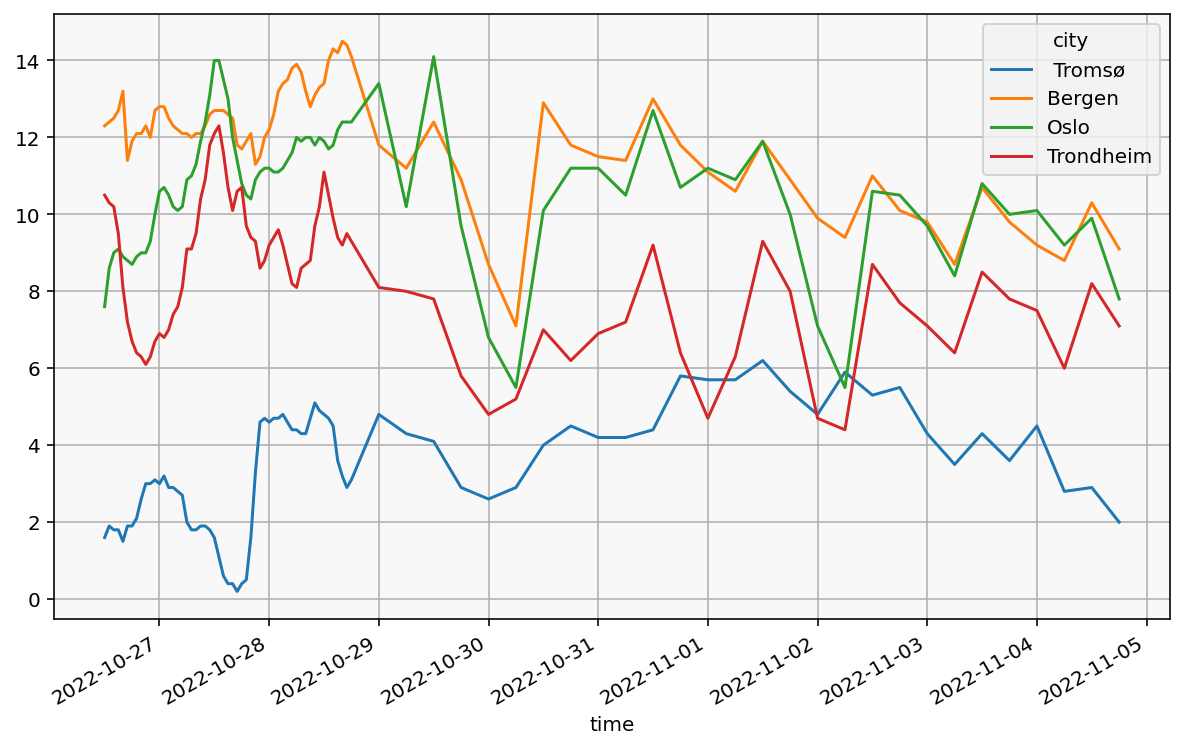

In [130]:
forecasts.groupby(["time", "city"]).air_temperature.first().unstack().plot()

<AxesSubplot:xlabel='time'>

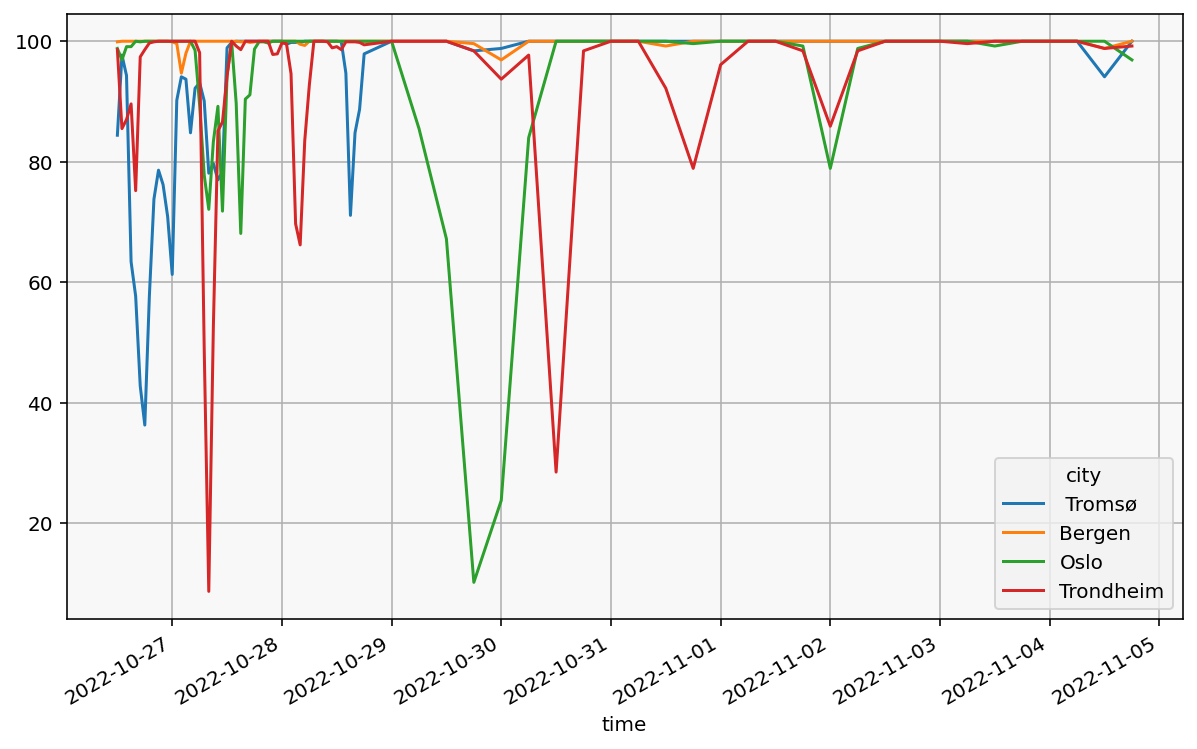

In [131]:
forecasts.groupby(["time", "city"]).cloud_area_fraction.first().unstack().plot()

In [132]:
forecasts["next_1_hours_symbol_code_clean"] = forecasts["next_1_hours_symbol_code"].str.split("_", n=1, expand=True)[0]

<AxesSubplot:xlabel='next_1_hours_symbol_code'>

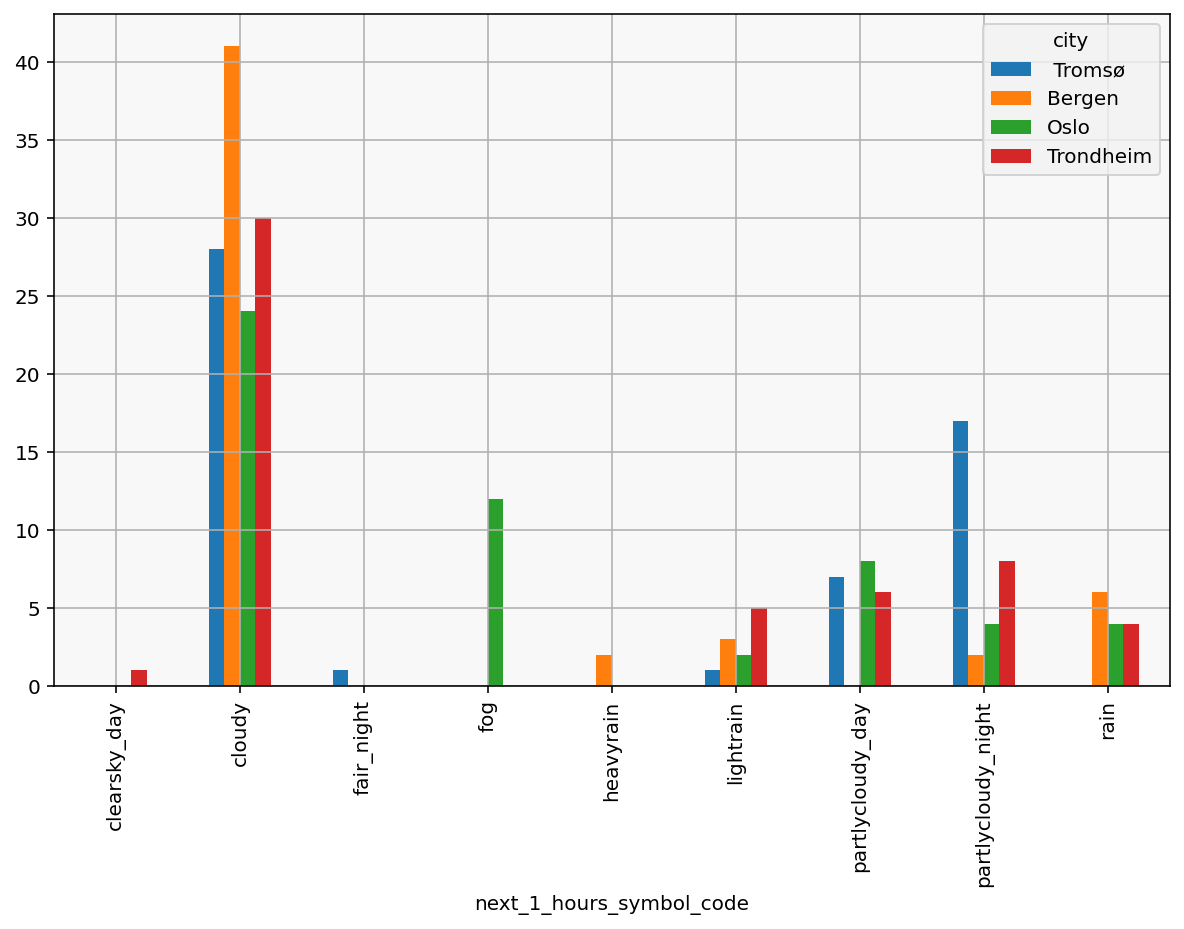

In [133]:
forecasts.groupby(["next_1_hours_symbol_code", "city"]).next_1_hours_symbol_code.count().unstack().plot(kind="bar")

In [128]:
forecasts["next_1_hours_symbol_code"].value_counts()

cloudy          123
partlycloudy     52
rain             14
fog              12
lightrain        11
heavyrain         2
fair              1
clearsky          1
Name: next_1_hours_symbol_code, dtype: int64

In [126]:
forecasts["next_1_hours_symbol_code"].str.split("_", n=1, expand=True)[0]

0           cloudy
1     partlycloudy
2           cloudy
3           cloudy
4           cloudy
          ...     
78             NaN
79             NaN
80             NaN
81             NaN
82             NaN
Name: 0, Length: 332, dtype: object

In [137]:
for n in (1, 6, 12):
    forecasts[f"next_{n}_hours_symbol_code_clean"] = forecasts[f"next_{n}_hours_symbol_code"].str.split("_", n=1, expand=True)[0]

<AxesSubplot:xlabel='next_1_hours_symbol_code_clean'>

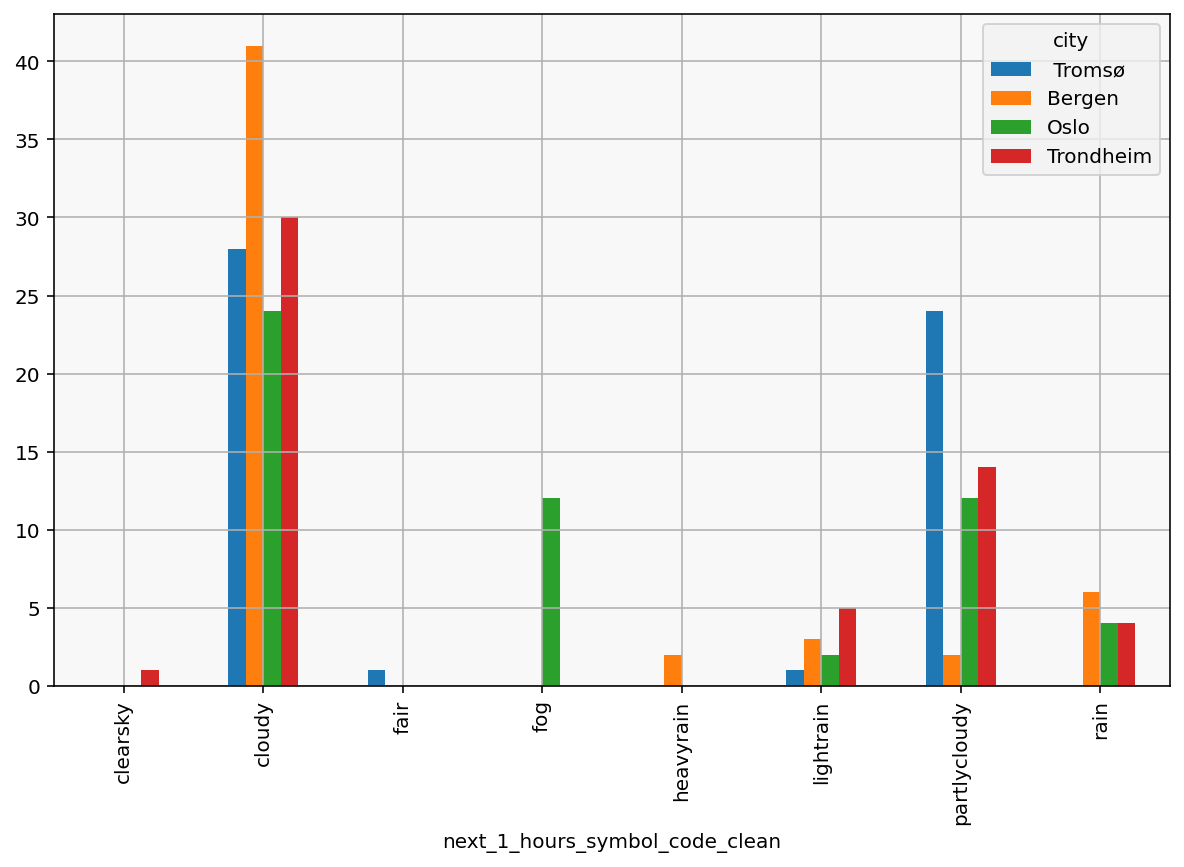

In [139]:
forecasts.groupby(["next_1_hours_symbol_code_clean", "city"]).next_1_hours_symbol_code.count().unstack().plot(kind="bar")

<AxesSubplot:xlabel='next_6_hours_symbol_code_clean'>

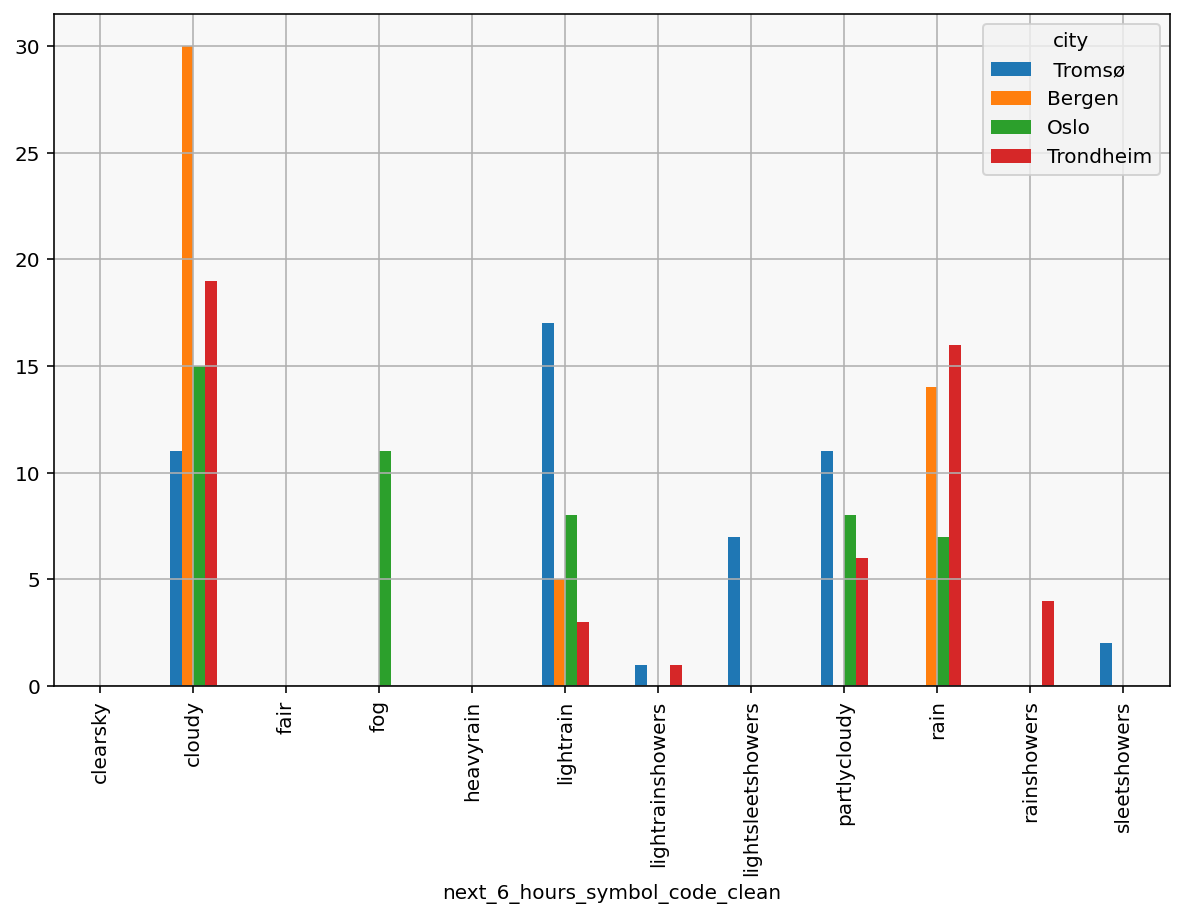

In [141]:
forecasts.groupby(["next_6_hours_symbol_code_clean", "city"]).next_1_hours_symbol_code.count().unstack().plot(kind="bar")

<AxesSubplot:xlabel='time'>

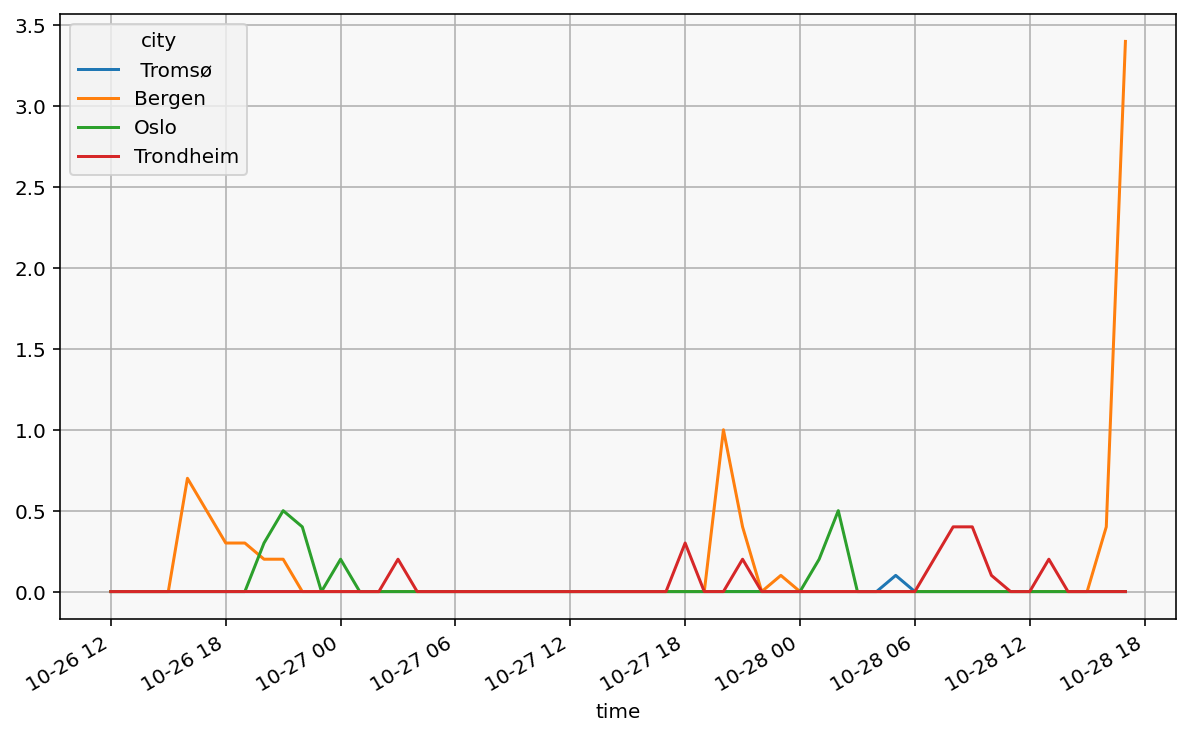

In [143]:
forecasts.groupby(["time", "city"]).next_1_hours_precipitation_amount.first().unstack().plot()

<AxesSubplot:xlabel='time'>

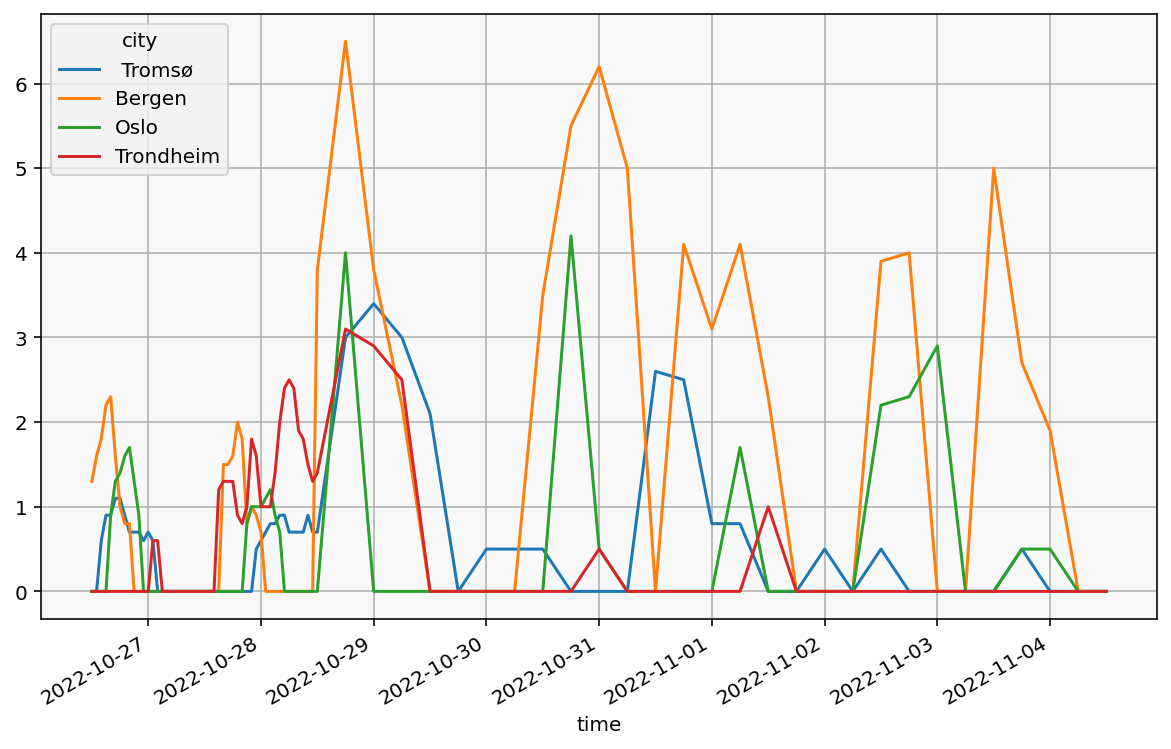

In [146]:
forecasts.groupby(["time", "city"]).next_6_hours_precipitation_amount.first().unstack().dropna().plot()